## CNNs
- Weaknesses of MLPs
- Overview of CNN
  - Convoluntions
  - Pooling Layers
- Coding CNN
- Using GPU with CNN

## Why are MLPs not good for Image Data? 

A multi-layer perceptron is good with structured data.  They are not ideal for image data.  Why are they not ideal for image data? 

![mnist_1layer.png](mnist_1layer.png)
https://ml4a.github.io/ml4a/looking_inside_neural_nets/

In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
train_images[0].shape

(32, 32, 3)

In [4]:
train_images.shape

(50000, 32, 32, 3)

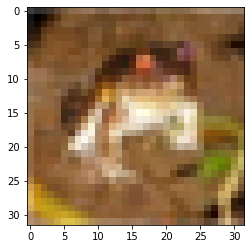

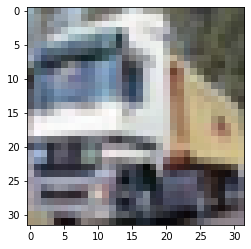

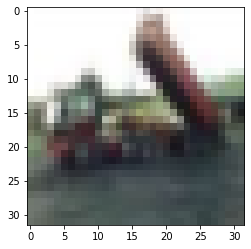

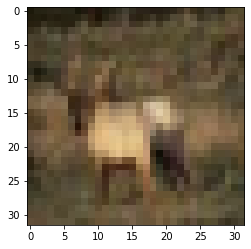

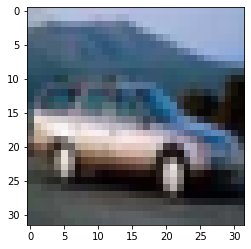

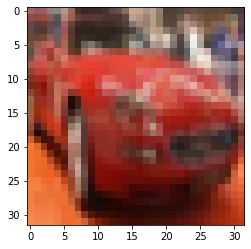

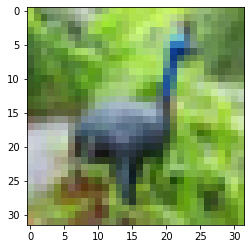

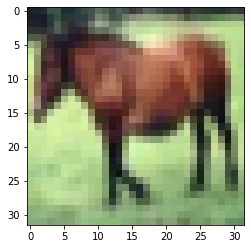

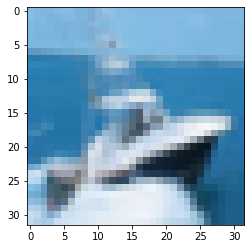

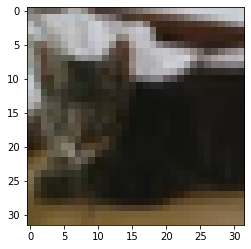

In [34]:
for i in range(10):
    plt.imshow(train_images[i])
    plt.show()

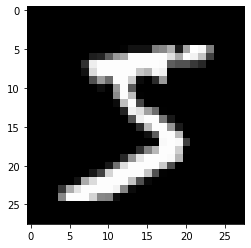

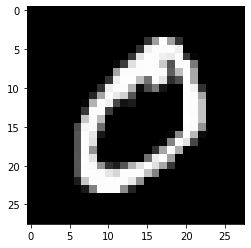

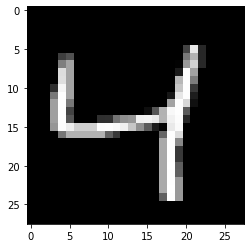

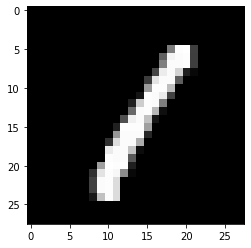

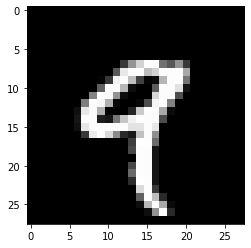

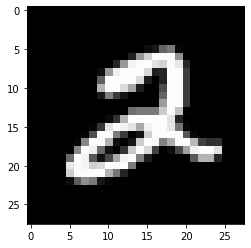

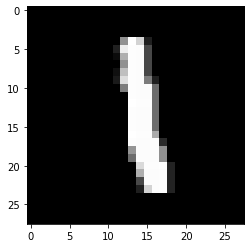

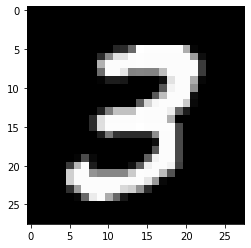

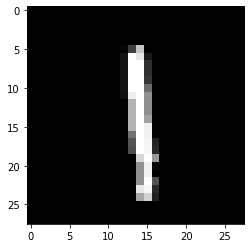

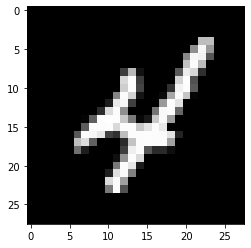

In [3]:
from keras.datasets import mnist 
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
for i in range(10):
    plt.imshow(train_images[i], cmap = 'gray')
    plt.show()

## Image Data
1. Still try out a MLP before a CNN
2. If that give bad results try a CNN

## What is a CNN?

![Image_158CNN.png](Image_158CNN.png)

## Convolutional Layer

![convolution-layer-a.png](convolution-layer-a.png)
[gif courtesy of Stanford University](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)

In [6]:
7/9

0.7777777777777778

![cnn6.png](cnn6.png)
http://brohrer.github.io/how_convolutional_neural_networks_work.html

- -1
- 1 
- 1
- 1 
- 1 
- 1
- 1 
- 1
- 1

In [1]:
7/9

0.7777777777777778

![H12H6.png](Hl2H6.png )
http://robotics.stanford.edu/~ang/papers/icml09-ConvolutionalDeepBeliefNetworks.pdf

## Pooling Layers

![pool.png](pool.png)
http://brohrer.github.io/how_convolutional_neural_networks_work.html

## CNN in Action

In [3]:
from keras.datasets import fashion_mnist

In [8]:
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

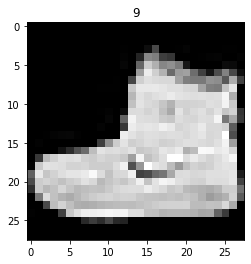

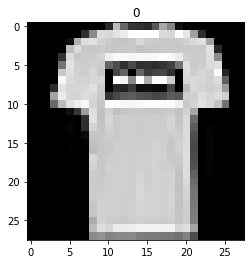

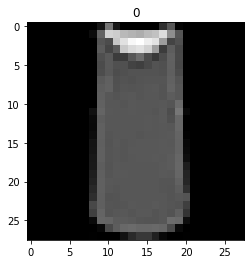

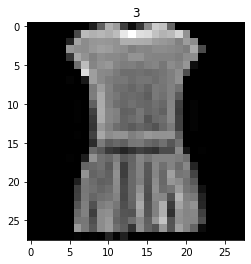

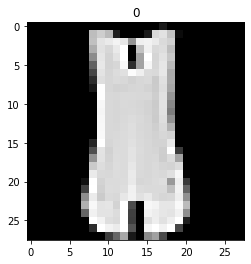

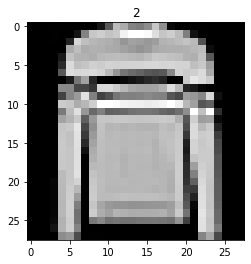

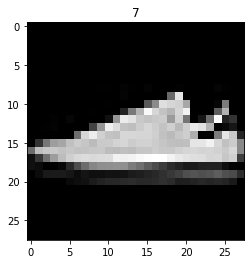

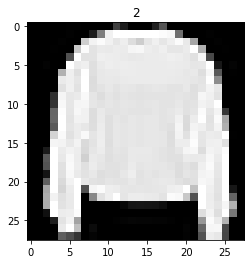

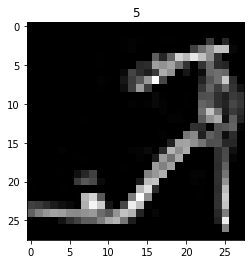

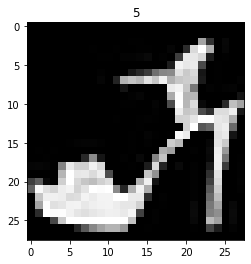

In [11]:
for i in range(10):
    plt.imshow(train_images[i], cmap = 'gray')
    plt.title(train_labels[i])
    plt.show()

In [12]:
from keras import models 
from keras import layers 

In [13]:
nn = models.Sequential()

nn.add(layers.Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
nn.add(layers.MaxPooling2D(2, 2))

nn.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
nn.add(layers.MaxPooling2D(2, 2))

nn.add(layers.Flatten())

nn.add(layers.Dense(10, activation = 'softmax'))

In [14]:
train_labels[0]

9

In [16]:
from keras.utils import to_categorical

In [17]:
train_labels_cat = to_categorical(train_labels)
train_labels_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [18]:
test_labels_cat = to_categorical(test_labels)

In [19]:
nn.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 17,578
Trainable params: 17,578
Non-trainable params: 0
__________________________________________________

In [21]:
nn.fit(train_images, train_labels_cat, epochs = 10, validation_split=0.2)

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (60000, 28, 28)

In [23]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [26]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [27]:
import time 

In [28]:
t0 = time.time()
nn.fit(train_images, train_labels_cat, epochs = 10, validation_split=0.2)
t1 = time.time()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 24s 507us/step - loss: 0.7101 - accuracy: 0.7954 - val_loss: 0.4363 - val_accuracy: 0.8401
Epoch 2/10
48000/48000 [==============================] - 23s 487us/step - loss: 0.3897 - accuracy: 0.8590 - val_loss: 0.3776 - val_accuracy: 0.8632
Epoch 3/10
48000/48000 [==============================] - 27s 553us/step - loss: 0.3465 - accuracy: 0.8739 - val_loss: 0.3858 - val_accuracy: 0.8644
Epoch 4/10
48000/48000 [==============================] - 26s 533us/step - loss: 0.3248 - accuracy: 0.8817 - val_loss: 0.3615 - val_accuracy: 0.8696
Epoch 5/10
48000/48000 [==============================] - 25s 522us/step - loss: 0.3099 - accuracy: 0.8869 - val_loss: 0.3455 - val_accuracy: 0.8792
Epoch 6/10
48000/48000 [==============================] - 26s 537us/step - loss: 0.2921 - accuracy: 0.8941 - val_loss: 0.3325 - val_accuracy: 0.8857
Epoch 7/10
48000/48000 [==============================] 

In [29]:
t1 - t0

255.13661074638367

https://www.kaggle.com/dansbecker/running-kaggle-kernels-with-a-gpu